# BASIC VERSION

In [ ]:
import pandas as pd  ####fondamentale per lavorare con dataset di diversi formati, per manipolarli 

In [ ]:
df = pd.DataFrame(pd.read_csv("Housing.csv")) #importo csv , ci serve per importare/caricare il csv sull'ambiente di sviluppo.

In [ ]:
#visualizzazione dati , ci permette di vedere come è strutturato il dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape #  è una tupla, che indica nnumero di righe e colonne presenti nel set di dati

(545, 13)

In [ ]:
columnList = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']    ##colonne che hanno dati in stringhe 

def binary_mapping(x):   ###eseguo mappattura , dando a stringhe valore numerico!
    return x.map({'yes': 1, "no": 0})    #utilizzo dict dove chiave = parole, valori = 0,1) ----> mappatura binaria 

df[columnList] = df[columnList].apply(binary_mapping)    ####prendo la colonna e 

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df['furnishingstatus'].nunique()    #nunique mi restituisce n di valori che abbiamo dentro la colonna ?furnis...??

###poichè abbiamo 3 valori---> mappiamo su 3 valori

3

In [ ]:
pd.get_dummies(df['furnishingstatus'])   #####avremo tali attributi con le colonne e vi assegna un numero binario , serve per maniploare meglio datasett

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [ ]:
columnList = ['furnishingstatus']

def tris_mapping(x):   #attribuisco dizionario per mappatura tripla, per valori da string a binario.  , esempi per manipolare dataset , poi settare iperparametri , cercare di vedere se risolve il problema e infine alzare le metriche!
    return x.map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

df[columnList] = df[columnList].apply(tris_mapping)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)    #80% training , 20% test set, random_state = suddivisione randomica fissa

In [ ]:
df_train.shape  

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
y_train = df_train.pop('price')   #quì stabilisco il target,
x_train = df_train

y_test = df_test.pop('price')    
x_test = df_test

In [ ]:
y_train   #visualizzazione per vedere se il target è stato estrapolato 

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()  #modello  
linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(x_test) #predizione del modello 

In [ ]:
from sklearn.metrics import r2_score   #metrica , RSS, lo scopo è quello di fare in modo che RSS sia più alta possibile ----100%, non si accetta sotto 75-95% (range di valori accettabili)
r2_score(y_test, y_pred)  

0.6494754192267804

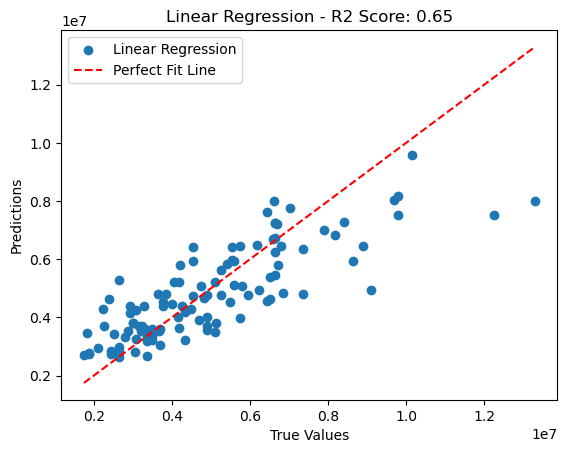

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Plotting the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, label='Linear Regression')

# Plotting the perfect fit line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
perfect_fit_line = np.linspace(min_val, max_val, 100)
ax.plot(perfect_fit_line, perfect_fit_line, color='red', linestyle='--', label='Perfect Fit Line')

ax.set_title('Linear Regression - R2 Score: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

#in questo caso il modello performa il 65% dei dati

# FEATURES TUNING

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   #cambio di scala , abbiamo valori interi( area, bedroom), voglio tutto in scala normalizzata , da 0 a 1  algoritmi ML lavorano meglio con dati normalizzati

In [ ]:
columns = ['area', 'bedrooms', 'bathrooms', 'parking']   
df[columns]= scaler.fit_transform(df[columns])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,3,1,0,0,0,1,0.666667,1,0
1,12250000,0.502405,0.6,1.000000,4,1,0,0,0,1,1.000000,0,0
2,12250000,0.571134,0.4,0.333333,2,1,0,1,0,0,0.666667,1,1
3,12215000,0.402062,0.6,0.333333,2,1,0,1,0,1,1.000000,1,0
4,11410000,0.396564,0.6,0.000000,2,1,1,1,0,1,0.666667,0,0


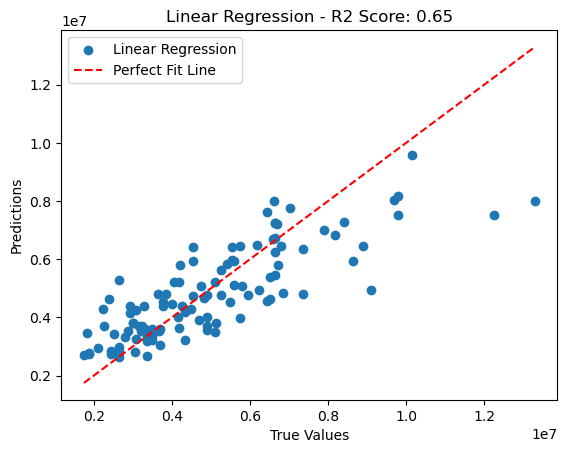

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)

y_train = df_train.pop('price')
x_train = df_train

y_test = df_test.pop('price')
x_test = df_test

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)



r2_score(y_test, y_pred)
# Plotting the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, label='Linear Regression')

# Plotting the perfect fit line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
perfect_fit_line = np.linspace(min_val, max_val, 100)
ax.plot(perfect_fit_line, perfect_fit_line, color='red', linestyle='--', label='Perfect Fit Line')

ax.set_title('Linear Regression - R2 Score: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


# ALTRI CLASSIFICATORI

In [ ]:
#DecisionTreeRegressor     , sono altre tecninche di ottimizazzione dei pesi , regolarizzano i pesi tramite alfa
#Ridge
#Logistic Regressiony
#Ensemble Random Forest
lst={'DecisionTreeRegressor':0, 'Ridge':0,'Lasso':0, 'Logistic_Regression':0}

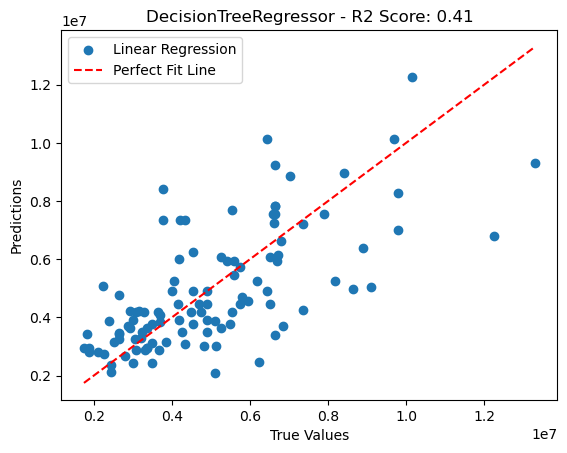

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()    #regressione con decision tree, molto probabile che vada in overfitting , troppo complesso per questo dataset, per tale motivo si abbassa r2
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
lst['DecisionTreeRegressor']=r2_score(y_test, y_pred)

r2_score(y_test, y_pred)

# Plotting the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, label='Linear Regression')

# Plotting the perfect fit line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
perfect_fit_line = np.linspace(min_val, max_val, 100)
ax.plot(perfect_fit_line, perfect_fit_line, color='red', linestyle='--', label='Perfect Fit Line')

ax.set_title('DecisionTreeRegressor - R2 Score: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()



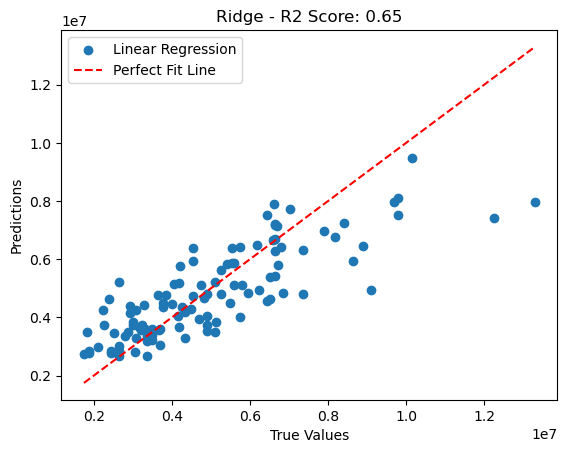

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)    ###setto tutti i pesi che hanno valore suoperiore a 0.5, gli altri scartali 
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
lst['Ridge']=r2_score(y_test, y_pred)

r2_score(y_test, y_pred)

# Plotting the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, label='Linear Regression')

# Plotting the perfect fit line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
perfect_fit_line = np.linspace(min_val, max_val, 100)
ax.plot(perfect_fit_line, perfect_fit_line, color='red', linestyle='--', label='Perfect Fit Line')

ax.set_title('Ridge - R2 Score: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


###come vediamo anche con settaggio dei pesi , il modello non migliora le metriche 

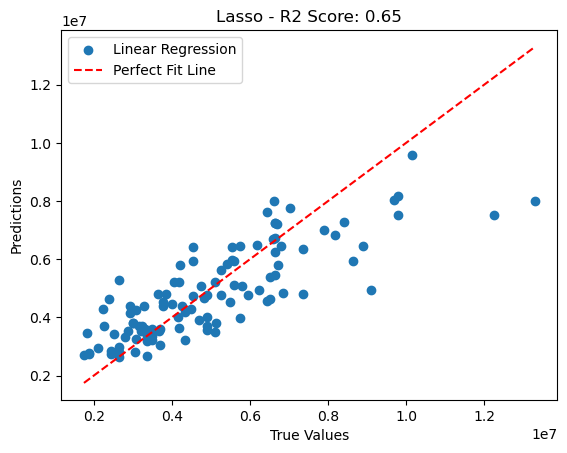

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=.5)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
lst['Lasso']=r2_score(y_test, y_pred)

r2_score(y_test, y_pred)

# Plotting the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, label='Linear Regression')

# Plotting the perfect fit line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
perfect_fit_line = np.linspace(min_val, max_val, 100)
ax.plot(perfect_fit_line, perfect_fit_line, color='red', linestyle='--', label='Perfect Fit Line')

ax.set_title('Lasso - R2 Score: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

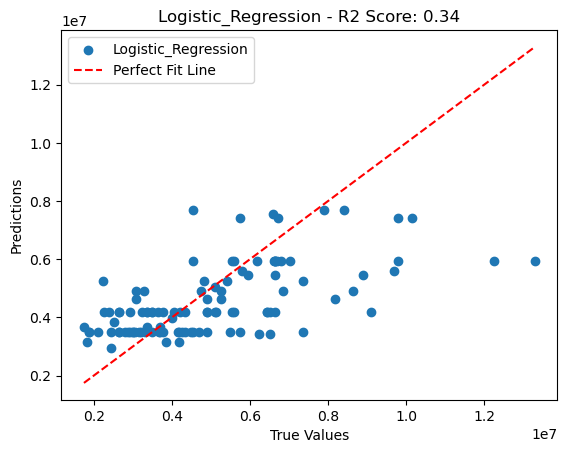

In [ ]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(max_iter=1000)   #adesso provo regressione logistica   ,
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)
lst['Logistic_Regression']=r2_score(y_test, y_pred)

r2_score(y_test, y_pred)

# Plotting the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, label='Logistic_Regression')

# Plotting the perfect fit line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
perfect_fit_line = np.linspace(min_val, max_val, 100)
ax.plot(perfect_fit_line, perfect_fit_line, color='red', linestyle='--', label='Perfect Fit Line')

ax.set_title('Logistic_Regression - R2 Score: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()



In [ ]:

###commento molte operazioni importanti ! , provare ad alzare le metriche!


# Selezionare una colonna
colonna = df['nome_colonna']

# Selezionare più colonne
colonne = df[['col1', 'col2']]

# Filtrare righe in base a una condizione
df = df[df['colonna'] > 50]

# Aggiungere una nuova colonna
df['nuova_colonna'] = df['col1'] + df['col2']

# Applicare una funzione a una colonna
df['colonna'] = df['colonna'].apply(lambda x: x * 2)

# Raggruppare il DataFrame per una colonna e calcolare la media
df = df.groupby('colonna').mean()

# Applicare diverse funzioni di aggregazione
df = df.groupby('colonna').agg({'col1': 'sum', 'col2': 'mean'})

# Contare i valori mancanti per colonna
df.isnull().sum()

# Eliminare righe con valori mancanti
df= df.dropna()

# Riempi valori mancanti con la media della colonna
df['colonna'].fillna(df['colonna'].mean(), inplace=True                

# Eliminare le righe con almeno un valore nullo
df = df.dropna()

# Eliminare le righe solo se tutti i valori sono nulli
df = df.dropna(how='all')        

# Eliminare le colonne con almeno un valore nullo
df = df.dropna(axis=1)

# Eliminare le colonne solo se tutti i valori sono nulli
df = df.dropna(axis=1, how='all')

# Riempire tutti i valori nulli con un valore specifico
df.fillna(value, inplace=True)